A notebook for testing the setup of OROS at the JAXA Sample Curation Facility.

# Process Overview

The objecgtive of this notebook is to test the installation of the OROS camera rig in the clean room of JAXA/ISAS, prior to conducting reflectance studies.

The functions to test are:
- camera connection
- image capture (manual exposure)
- image capture - autoexposure

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
date = '02102023'

# Camera Connection

Here we configure and setup the camera capture objects.

In [10]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras) # updated bias to 4 DN

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Image size: 1920 x 1200 pixels
Image buffer size: 36864000 bytes
Bits per pixel: 2
Color Format: SinkFormats.Y16
Frame Rate: 33
Brightness current Value: 4
Contrast current Value: 0
Sharpness current Value: 0
Gamma current Value: 100
Gain current Value: 4.300000190734863
Gain current Auto: 0


# Image Capture (Manual Exposure)

Here we capture 1 image with each channel using an exposure of 300 ms.

In [ ]:
man_exposures = {}
for camera in cameras:
    man_exposures[camera.name] = 0.3 

In [ ]:
osc.capture_channel_images(
    cameras, 
    man_exposures, 
    subject=f'isas_testing_'+date, 
    repeats=1,
    roi=False, 
    show_img=True,
    save_img=False) 

# Image Capture - Autoexposure

Here we test the autoexposure function and attempt to capture dark images with a mean value of 1% of the camera response range. (Assumes that light conditions are low).

In [ ]:
auto_exposures = osc.find_channel_exposures(cameras, roi=True, target=0.80, n_hot = 100, tol=25)

In [ ]:
osc.capture_channel_images(
    cameras, 
    auto_exposures, 
    subject=f'isas_testing_sample'+date, 
    img_type='img',
    repeats=1,
    roi=False, 
    show_img=True,
    save_img=True) 

# Sample Capture

In [10]:
cameras[0].number

0

In [4]:
exp_vals = {
    0: 6.50,
    1: 0.43,
    2: 11.12,
    3: 0.730,
    4: 0.837,
    5: 25.0,
    6: 0.64,
    7: 2.5
}

In [5]:
man_exposures = {}
for camera in cameras:
    man_exposures[camera.name] = exp_vals[camera.number]

-----------------------------------
Device 0
-----------------------------------
Imaging with Exposure: 6.5 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 6.5 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS


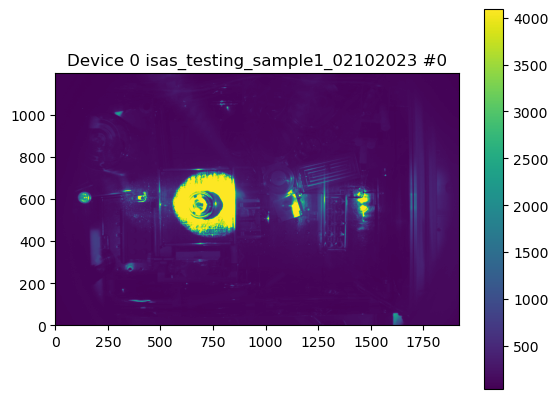

Exposure current Value: 6.5
Image 0 written to ..\data\isas_testing_sample1_02102023\0_850\850_0_img.tif
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Imaging with Exposure: 0.4300000071525574 s
+Good exposure 0.4300000071525574 Image recieved


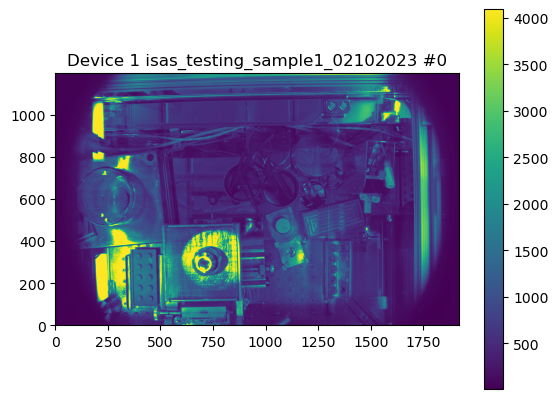

Exposure current Value: 0.4300000071525574
Image 0 written to ..\data\isas_testing_sample1_02102023\1_475\475_0_img.tif
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Imaging with Exposure: 11.119998931884766 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 11.119998931884766 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS


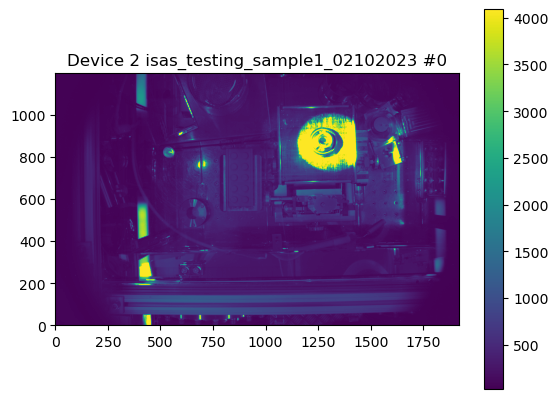

Exposure current Value: 11.119998931884766
Image 0 written to ..\data\isas_testing_sample1_02102023\2_400\400_0_img.tif
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Imaging with Exposure: 0.7300000190734863 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.7300000190734863 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS


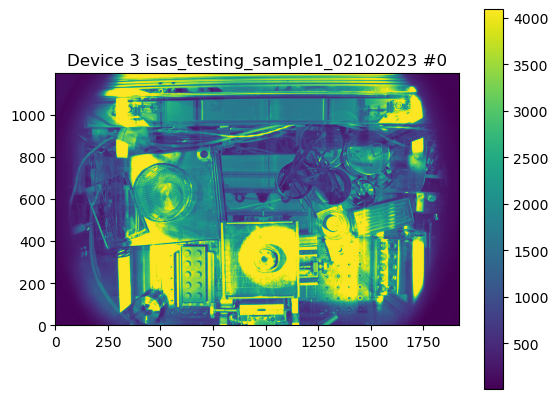

Exposure current Value: 0.7300000190734863
Image 0 written to ..\data\isas_testing_sample1_02102023\3_550\550_0_img.tif
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Imaging with Exposure: 0.8370000123977661 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.8370000123977661 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS


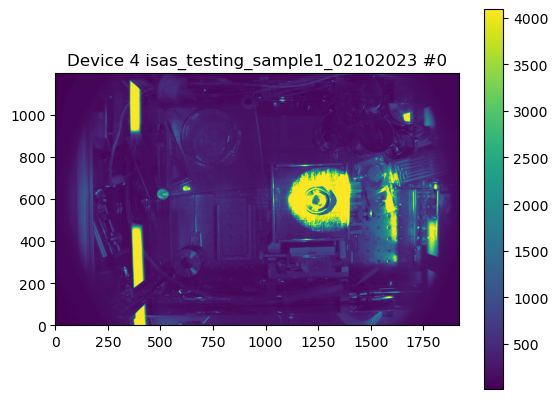

Exposure current Value: 0.8370000123977661
Image 0 written to ..\data\isas_testing_sample1_02102023\4_725\725_0_img.tif
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Imaging with Exposure: 25.0 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 25.0 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS


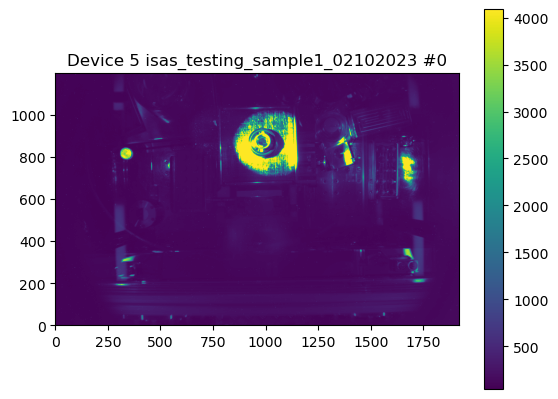

Exposure current Value: 25.0
Image 0 written to ..\data\isas_testing_sample1_02102023\5_950\950_0_img.tif
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Imaging with Exposure: 2.5 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 2.5 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS


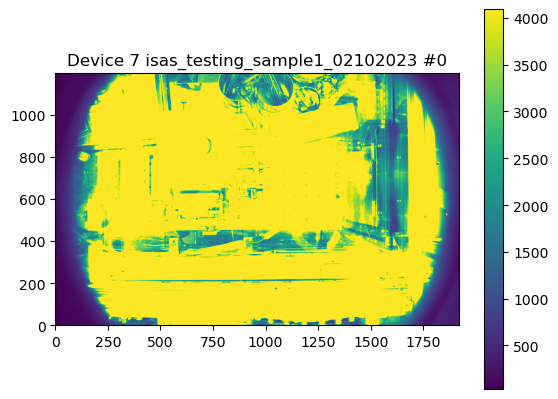

Exposure current Value: 2.5
Image 0 written to ..\data\isas_testing_sample1_02102023\7_550\550_0_img.tif
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Imaging with Exposure: 0.6399989724159241 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.6399989724159241 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS


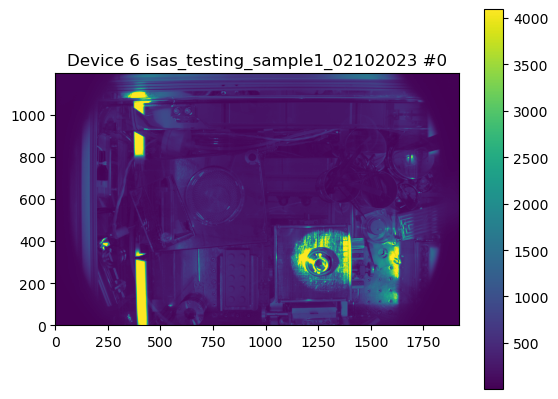

Exposure current Value: 0.6399989724159241
Image 0 written to ..\data\isas_testing_sample1_02102023\6_650\650_0_img.tif
-----------------------------------


In [6]:
osc.capture_channel_images(
    cameras, 
    man_exposures, 
    subject=f'isas_testing_sample1_'+date, 
    repeats=1,
    roi=False, 
    show_img=True,
    save_img=True) 

# Spectralon Imaging

In [14]:
exp_vals = {
    0: 0.2,
    1: 0.05,
    2: 0.22,
    3: 1.0/47,
    4: 1.0/60,
    5: 1.260,
    6: 1.0/25,
    7: 1.0/54
}

In [15]:
man_exposures = {}
for camera in cameras:
    man_exposures[camera.name] = exp_vals[camera.number]

-----------------------------------
Device 0
-----------------------------------
Imaging with Exposure: 0.20000000298023224 s
+Good exposure 0.20000000298023224 Image recieved


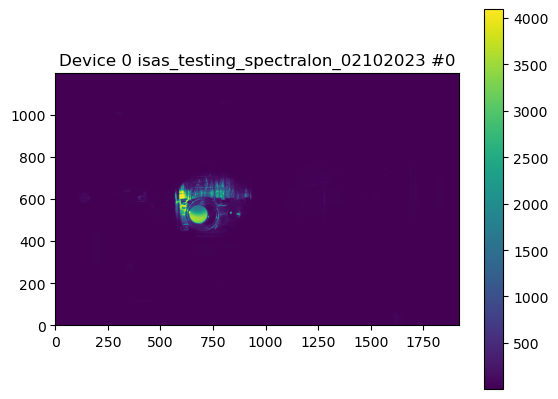

Exposure current Value: 0.20000000298023224
Image 0 written to ..\data\isas_testing_spectralon_02102023\0_850\850_0_img.tif
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Imaging with Exposure: 0.05000000074505806 s
+Good exposure 0.05000000074505806 Image recieved


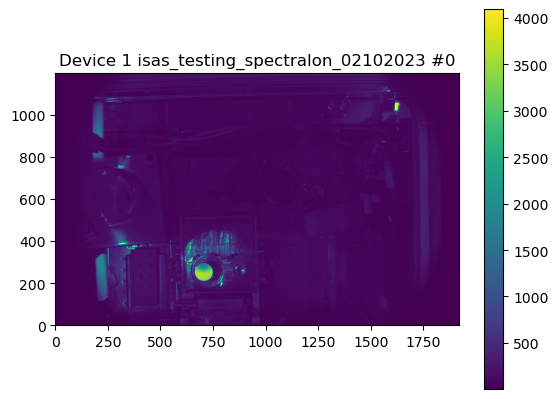

Exposure current Value: 0.05000000074505806
Image 0 written to ..\data\isas_testing_spectralon_02102023\1_475\475_0_img.tif
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Imaging with Exposure: 0.21999900043010712 s
+Good exposure 0.21999900043010712 Image recieved


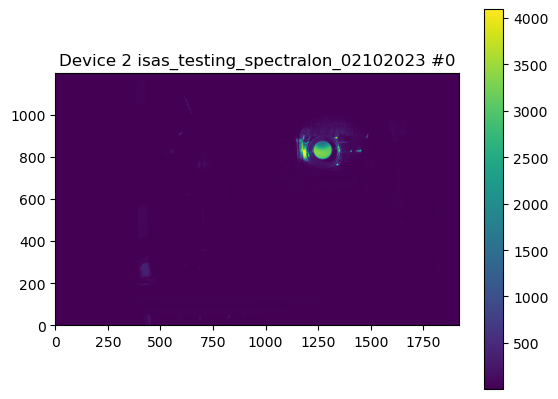

Exposure current Value: 0.21999900043010712
Image 0 written to ..\data\isas_testing_spectralon_02102023\2_400\400_0_img.tif
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Imaging with Exposure: 0.021276000887155533 s
+Good exposure 0.021276000887155533 Image recieved


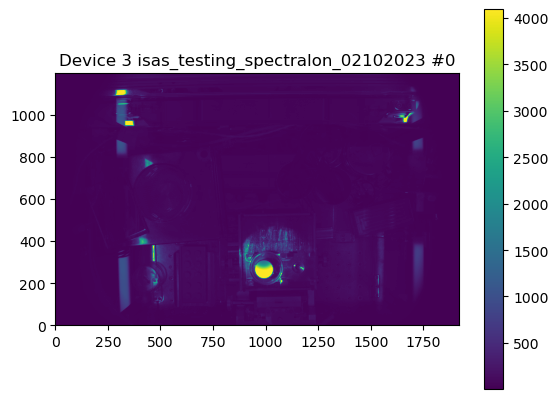

Exposure current Value: 0.021276000887155533
Image 0 written to ..\data\isas_testing_spectralon_02102023\3_550\550_0_img.tif
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Imaging with Exposure: 0.016666000708937645 s
+Good exposure 0.016666000708937645 Image recieved


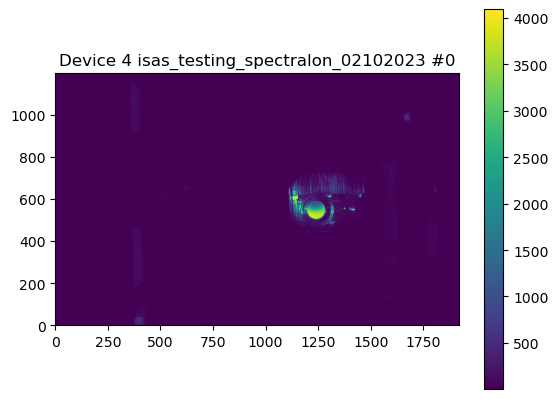

Exposure current Value: 0.016666000708937645
Image 0 written to ..\data\isas_testing_spectralon_02102023\4_725\725_0_img.tif
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Imaging with Exposure: 1.2599990367889404 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 1.2599990367889404 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS


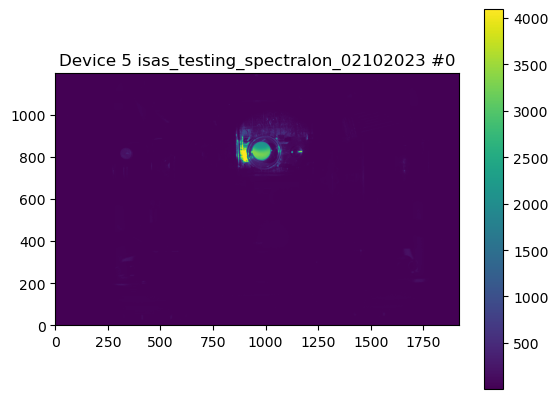

Exposure current Value: 1.2599990367889404
Image 0 written to ..\data\isas_testing_spectralon_02102023\5_950\950_0_img.tif
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Imaging with Exposure: 0.018518000841140747 s
+Good exposure 0.018518000841140747 Image recieved


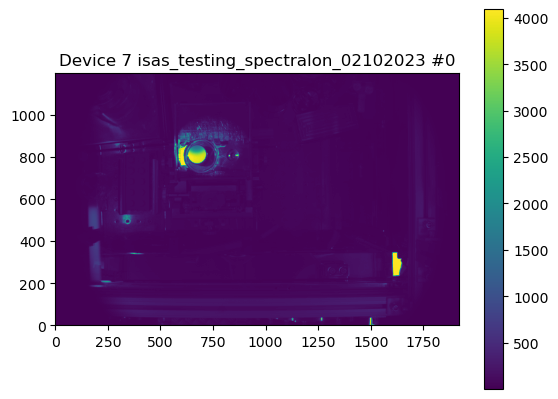

Exposure current Value: 0.018518000841140747
Image 0 written to ..\data\isas_testing_spectralon_02102023\7_550\550_0_img.tif
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Imaging with Exposure: 0.03999900072813034 s
+Good exposure 0.03999900072813034 Image recieved


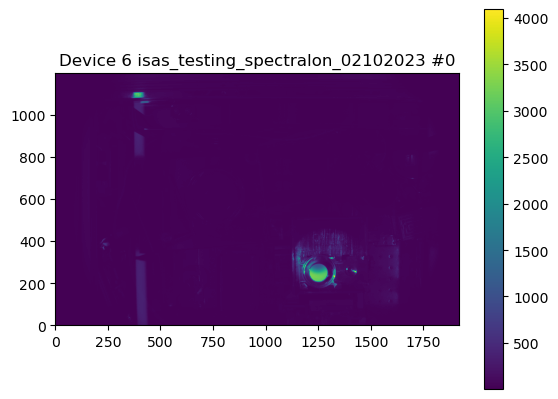

Exposure current Value: 0.03999900072813034
Image 0 written to ..\data\isas_testing_spectralon_02102023\6_650\650_0_img.tif
-----------------------------------


In [16]:
osc.capture_channel_images(
    cameras, 
    man_exposures, 
    subject=f'isas_testing_spectralon_'+date, 
    repeats=1,
    roi=False, 
    show_img=True,
    save_img=True) 